## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [Resources](#resources)


<a id='intro'></a>
### Introduction


For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read the dataset and display few rows
ab_test_df = pd.read_csv('ab_data.csv')
ab_test_df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Let's look at the shape of our dataset
ab_test_df.shape

(294478, 5)

Our dataset contains 294478 entries with 5 columns

In [4]:
# This section will give us general information about our dataset
ab_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
# describe() will tell us more about the datadset
ab_test_df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


c. The number of unique users in the dataset.

In [6]:
# Let's now determine the number of unique users
ab_unique = ab_test_df['user_id'].nunique()
ab_unique

290584

There are 290584 unique users. Which means there are 3894 (294478 - 290584) duplicated users. 

d. The proportion of users converted.

In [7]:
# Let us now determine the proportion of users converted
# Total conversion
converted_counts = ab_test_df.converted.value_counts()[1]
converted_counts

35237

There were 35237 converted users

In [8]:
# Total entries in the dataset
total_counts = ab_test_df.converted.count()
total_counts

294478

In [9]:
# Proportion converted user 
converted_prob = converted_counts / total_counts
converted_prob

0.11965919355605512

About 12% of the customers were converted. This value includes both the control and treatment groups.

e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
# Now we will determine the number of times the landing_page has new_page 
# treatment_df = ab_test_df.query('group == "treatment"')

In [11]:
# Now we will determine the number of times the group has treatment
# non_new_page = treatment_df.landing_page.value_counts()['new_page']
# non_new_page

In [12]:
# https://knowledge.udacity.com/questions/94024
non_aligned = ab_test_df[((ab_test_df['group'] == 'treatment') == (ab_test_df['landing_page'] == 'new_page')) == False].shape[0]
non_aligned

3893

In [13]:
# https://knowledge.udacity.com/questions/270530
# non_aligned_data = ab_test_df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')
# non_aligned_data

There were 3893 number of time where new_page and treatment were not aligned

f. Do any of the rows have missing values?

In [14]:
missing_values = ab_test_df[ab_test_df.isnull().any(axis=1)]
missing_values

,user_id,timestamp,group,landing_page,converted


This shows that none of the rows have missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
df2 = ab_test_df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')

In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
# Let's now determine the number of unique users in df2
df2_unique = df2['user_id'].nunique()
df2_unique

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
duplicated_row_df = df2[df2.duplicated('user_id')]
duplicated_row_df

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The user_id belonging to 773192 was duplicated as shown above 

c. What is the row information for the repeat **user_id**? 

The row information for the non-unique user_id are: 
    (1) group : treatment 
    (2) landing_page: new_page
    (3) converted: 0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# This section removes the duplicated user_id
df2 = df2.drop_duplicates('user_id') 
df2.shape

(290584, 5)

In [20]:
duplicated_row_df

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The above output confirms that the duplicated user_id has been removed

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# Let us now determine the probability of conversion for all users 
# Total conversion
converted_total = df2.converted.value_counts()[1]
converted_total

34753

In [22]:
# Total entries in the dataset
all_total = df2.converted.count()
all_total

290584

In [23]:
# Probability of conversion irrespective of page they receive 
conversion_prob = converted_total / all_total
conversion_prob

0.11959708724499628

The probability of conversion is 0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
# Let us extract all actions from control group by forming a dataframe
control_df = df2.query('group == "control"')
control_df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [25]:
# Let us extract all actions from control group
control_total = control_df.shape[0]
control_total

145274

In [26]:
# Let us extract all conversion from control group
# Where converted column is 1 for control group
conversion_control = control_df.query('converted == 1').shape[0]
conversion_control



17489

In [27]:
# Probability of conversion for control group
control_prob = conversion_control / control_total
control_prob

0.1203863045004612

The probability of conversion for control group is 0.1204 

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [28]:
# Let us extract all actions from treatment group by forming a dataframe
treatment_df = df2.query('group == "treatment"')
treatment_df

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [29]:
# Let us extract all actions from treatment group
treatment_total = treatment_df.shape[0]
treatment_total

145310

In [30]:
# Let us extract all conversion from treatment group
# Where converted column is 1 for treatment group
conversion_treatment = treatment_df.query('converted == 1').shape[0]
conversion_treatment

17264

In [31]:
# Probability of conversion for control group
treatment_prob = conversion_treatment / treatment_total
treatment_prob

0.11880806551510564

The probability of conversion for control group is 0.1188

d. What is the probability that an individual received the new page?

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


The probability of individual receiving new page  = number of new page / (number of new page + number of old page)  

In [33]:
# Let us determine number of individual that received new page
num_new_page = df2.query('landing_page == "new_page"').shape[0]
num_new_page

145310

In [34]:
# Let us determine number of individual that received old page
num_old_page = df2.query('landing_page == "old_page"').shape[0]
num_old_page

145274

In [35]:
# Probability of individual receiving new page
new_page_prob = num_new_page / (num_new_page + num_old_page)
new_page_prob

0.5000619442226688

The probalibilty of individual that received the new page is 0.5. 
That means 50% of the participants received new page. 

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The probability of conversions from the control group, 0.1204, is slightly higher than the probability of conversion from the treatment group 0.1188. This mean that the new treatment page does not necessarily lead to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p>$H_{1}$ : $p_{new}$ > $p_{old}$</p>
<p>$H_{0}$ : $p_{new}$ =< $p_{old}$</p>
<br>
    Null Hypothesis($H_{0}$): The new version is not better, or even worse than the old version.
    Alternative Hypothesis($H_{1}$): The new version is better than the old version.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [36]:
# The probability of conversion under the null
# The probability of conversion for new page is equal to probability of conversion for old page
# Probability of conversion for new page 
p_new = df2['converted'].mean()
p_new


0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [37]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [38]:
# Total number of conversion for new page
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [39]:
# Total number of conversion for old page
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [40]:
# Simulation of n_new transactions with conversion rate of p_new under null hypothesis
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
# Simulation of n_new transactions with conversion rate of p_new under null hypothesis
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [42]:
# Let us estimate the mean for new_page_converted and old_page_converted
average_new_null = new_page_converted.mean()
average_old_null = old_page_converted.mean()

In [43]:
# We can use the values above to estimate the difference in probalibilities
p_diff = average_new_null - average_new_null
p_diff

0.0

Under null, there is no difference in conversion based on pages. 
This means that the conversions for each page are the same.

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [44]:
# 10,000 simulation for p_new
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_mean = new_page_converted.mean()
    old_page_mean = old_page_converted.mean()
    p_diffs.append(new_page_mean - old_page_mean)

In [45]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 1.55352805e-03,  3.83078259e-04,  2.31943843e-04, ...,
        6.99995857e-04,  6.10564354e-04, -7.08127260e-05])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

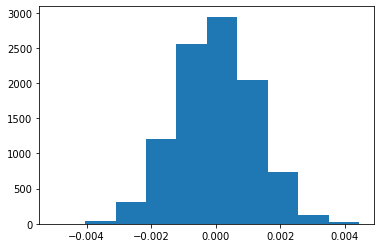

In [46]:
plt.hist(p_diffs);

The taller peak show that p-values are close to zero. 
The histogram is also symmetrical, where the peak is approximately zero. This agrees with what we discover in a - g above.
The p-values depth on the right hand side indicates how many of our p-values are null 
and this is a replica of what we have on the left hand side that represent the alternative.  

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
(p_diffs > p_diff).mean()

0.5029

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is the value we used as an alternative to reject the null hypothesis. 
The scientific name for it is p-value.
When the p-value is small, it mean that we hae strong evidence to support the alternative hypothesis.
The value of p-value is high in this case making it not advisable for us reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
import statsmodels.api as sm

# number of conversion under control 
convert_old = sum((df2.group == 'control') & (df2.converted == 1))

# number of conversion under treatment
convert_new = sum((df2.group == 'treatment') & (df2.converted == 1))

# total number of control
n_old = sum(df2.group == 'control') 

# total number of treatment
n_new = sum(df2.group == 'treatment')


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [49]:
z_test, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(z_test)
print(p_value)

1.3109241984234394
0.9050583127590245


We got the z_test value of approximately 1.31 and a p_value of 0.91

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p_values calculated here and the one in j and k are different. Under j, we got 0.5028 and here 0.9051.
The p_value under signifies the probalibity to accept the null hypothesis, which has the hypothesis of <= and the alternate was >. Meanwhile, the hypothesis under consideration here is = while the alternate is !=.
The z_score the measure of how far a point is from the mean of distribution. It is 1.31 standard deviation above the mean. The z-score suggests that the null hypothesis should not be rejected.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In [50]:
# https://knowledge.udacity.com/questions/185938

**We should perform a logical regression since each rows is either a conversion or no conversion.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
# Let us create a column for intercept
df2[['group_response', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,group_response,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [52]:
# We will now drop the intercept column, there is no need to use two since they both have values of 0 and 1
df2 = df2.drop('group_response', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [53]:
# We will now use statsmodels to import our regression model
df2['intercept'] = 1

# Predict the model
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# Fit our model
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
# Display summary for our prediction
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:39:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p_value for ab_page here is 0.190 while that of Part II was 0.905. The logistic regression used a two-tailed test in order to determine the coefficient of ab_page i.e 
the null hypothesis is equal to zero and the alternate hypothesis is not equal to zero. But the null hypothesis in Part II states that p_new is greater than p_old, while the alternative hypothesis states that p_new is less or equal to p_old**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**When we add other factors to the model it will help in better prediction of the dependent variable. However, these factors, it they collinear will introduce noise into our prediction and make it difficult for us to make a better predictions.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [57]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [60]:
### Create the necessary dummy variables
# Let us create a column for intercept
# Let us create a column for intercept
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [61]:
# We will now drop the CA column, there is no need to use three since they all have values of 0 and 1
df_new = df_new.drop('CA', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [64]:
# We will now use statsmodels to import our regression model
df_new['intercept'] = 1

# Predict the model
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])

In [67]:
### Fit Our Linear Model And Obtain the Results

# Fit our model
results = logit_mod.fit()

# Display summary for our prediction
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:55:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [71]:
#Where -0.0408 and 0.099 are the coefficients for countries US and UK respectively
np.exp(-0.0408), np.exp(0.099)

(0.9600211149716509, 1.104066299558882)

**The p_value of 0.05 or less indicates that the variable statistically significant in predicting the outcome.
The p_value of 0.13 and 0.457 for US and UK respectively shows that countries are not statistically significant in predicting the conversion.
We therefore fail to reject the null hypothesis.
Conversion for US is 96% while conversion for UK is 110% when we hold all other variables constant for each.**


In [66]:
# Create addiotional columns to determine the relationship between country and ab_page
df_new['page_US'] = df_new['ab_page']*df_new['US']
df_new['page_UK'] = df_new['ab_page']*df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,US,UK,page_US,page_UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [68]:
# We will now use statsmodels to import our regression model
df_new['intercept'] = 1

# Predict the model
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'page_US', 'page_UK']])

In [69]:
### Fit Our Linear Model And Obtain the Results

# Fit our model
results = logit_mod.fit()

# Display summary for our prediction
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:               3.482e-05
Time:                        15:56:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_US       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [72]:
#Where -0.0175 and -0.0057, -0.0469 and 0.0314 are the coefficients for countries US, UK, page_US and page_UK respectively
np.exp(-0.0175), np.exp(-0.0057), np.exp(-0.0469), np.exp(0.0314)

(0.9826522356650732,
 0.9943162141784332,
 0.9541828111007262,
 1.0318981806179213)

**The p_value of 0.05 or less indicates that the variable statistically significant in predicting the outcome.
The p_value of 0.642, 0.760, 0.383 and 0.238 for US,  UK, page_US and page_UK respectively shows that countries and individual receiving treatment page rather than control page are not statistically significant in predicting the conversion.
We therefore fail to reject the null hypothesis.
Conversion for US is 98% while conversion for UK is 99% when we hold all other variables constant for each.
Meanwhile conversion for individual receiving treatment page rather than control page for US and UK are 95% and 103% respectively when we hold all other variables constant**

<a id='conclusions'></a>
## Conclusions

Considering the AB testing and predictions from our logistic regression, we fail to reject the null hypothesis. We can also conclude that countries of residence for the individual is not statistically significant in predicting the outcome of our model.



<a id='resources'></a>
## Resources

1. https://www.geeksforgeeks.org/python-pandas-series-nunique/
2. https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
3. https://knowledge.udacity.com/questions/270530
4. https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values
5. https://knowledge.udacity.com/questions/36758
6. https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
7. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.drop_duplicates.html
8. https://static1.squarespace.com/static/55bfa8e4e4b007976149574e/t/5b9c283921c67c888ccfe180/1536960570194/Analyze_ab_test_results_notebook.pdf
9. https://knowledge.udacity.com/questions/230245
10. https://knowledge.udacity.com/questions/85575
11. https://knowledge.udacity.com/questions/154972
12. http://varianceexplained.org/statistics/interpreting-pvalue-histogram/
13. https://knowledge.udacity.com/questions/26449
14. https://www.investopedia.com/terms/p/p-value.asp
15. https://knowledge.udacity.com/questions/26449
16. https://knowledge.udacity.com/questions/205816
17. https://knowledge.udacity.com/questions/154063
18. https://knowledge.udacity.com/questions/8248
19. https://knowledge.udacity.com/questions/21528
20. https://knowledge.udacity.com/questions/199735
21. https://knowledge.udacity.com/questions/227837
